<h1><center><span style="font-family: 'Dancing Script', cursive;"><b>Customer Segmentation | K-means & PCA</b></span></center></h1>


<h1><center><span style="font-family: 'Dancing Script', cursive;"><b> Import Packages & Dataset </b></span></center></h1>

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/predicting-credit-card-customer-attrition-with-m/BankChurners.csv')

<h1><center><span style="font-family: 'Dancing Script', cursive;"><b> Initial Analysis </b></span></center></h1>

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df.shape

(10127, 23)

In [6]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<h1><center><span style="font-family: 'Dancing Script', cursive;"><b> Data Cleaning </b></span></center></h1>

In [10]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
df_duplicated = df[df.duplicated()]
df_duplicated.shape[0]

0

In [12]:
mean_median = pd.concat([df.mean(numeric_only=True),df.median(numeric_only=True)], axis=1)
mean_median.columns = ['Mean', 'Median']
mean_median

,Mean,Median
CLIENTNUM,7.391776e+08,7.179264e+08
Customer_Age,4.632596e+01,4.600000e+01
Dependent_count,2.346203e+00,2.000000e+00
Months_on_book,3.592841e+01,3.600000e+01
Total_Relationship_Count,3.812580e+00,4.000000e+00
Months_Inactive_12_mon,2.341167e+00,2.000000e+00
Contacts_Count_12_mon,2.455317e+00,2.000000e+00
Credit_Limit,8.631954e+03,4.549000e+03
Total_Revolving_Bal,1.162814e+03,1.276000e+03
Avg_Open_To_Buy,7.469140e+03,3.474000e+03


<h1><center><span style="font-family: 'Dancing Script', cursive;"><b> Data Visualalization </b></span></center></h1>

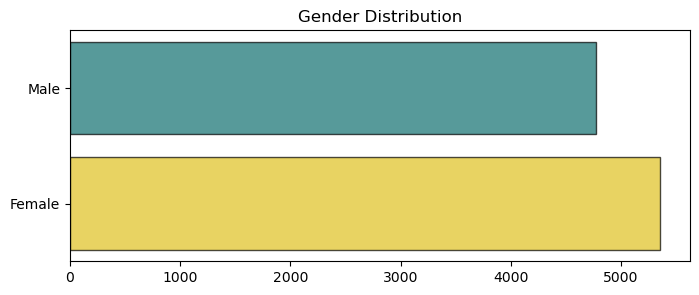

In [13]:
custom_palette = {'M': 'teal', 'F': 'gold'}
plt.figure(figsize = (8, 3))
sns.countplot(data = df, y = 'Gender', alpha=0.7, palette=custom_palette, edgecolor='black')
plt.xlabel('')
plt.ylabel('')
plt.title('Gender Distribution')
plt.gca().set_yticklabels(['Male', 'Female'])
plt.show()

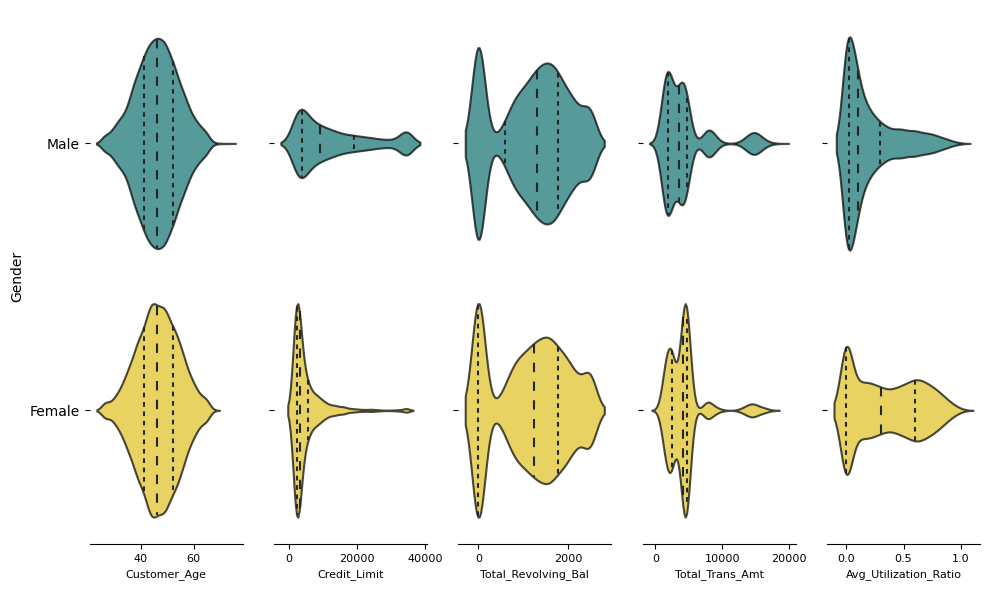

In [14]:
plt.figure(figsize=(10, 6))

for i, var in enumerate(['Customer_Age' , 'Credit_Limit' , 'Total_Revolving_Bal', 
                         'Total_Trans_Amt', 'Avg_Utilization_Ratio'], 1):
    plt.subplot(1, 5, i)
    ax = sns.violinplot(data=df, x=var, y ='Gender', palette=custom_palette, 
                        inner='quartile')
    plt.ylabel('Gender' if i==1 else '', fontsize=10)
    plt.xticks(fontsize=8)
    plt.xlabel(var, fontsize=8)
    plt.gca().set_yticklabels(['Male', 'Female'] if i == 1 else '')
    plt.setp(ax.collections, alpha=.7, edgecolor='black')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

plt.tight_layout()  
plt.show()

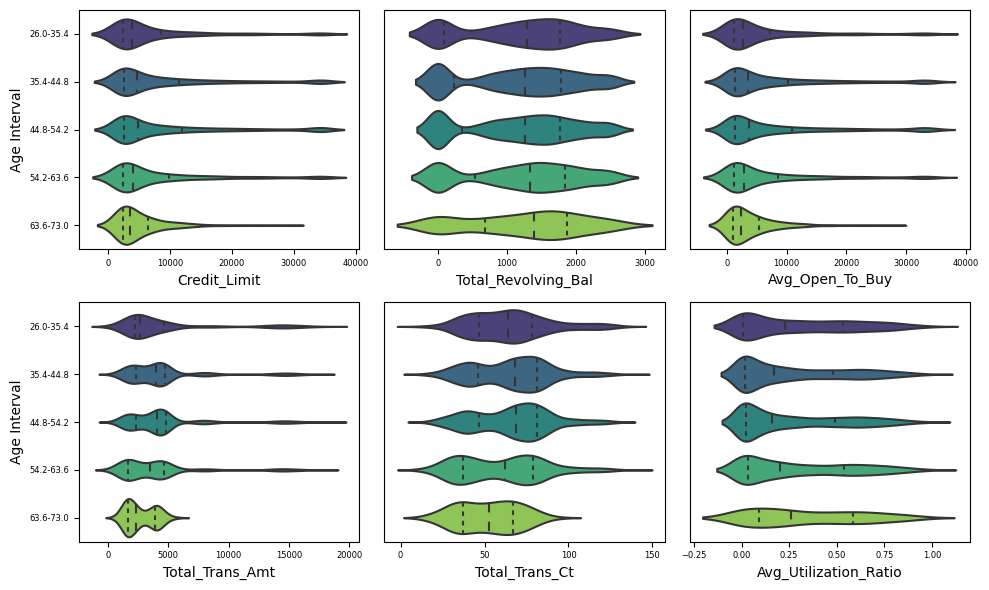

In [15]:
df['AgeGroup'] = pd.cut(df['Customer_Age'], bins=5)

def format_interval(interval):
    return f'{interval.left:.1f}-{interval.right:.1f}'

df['AgeGroupLabel'] = df['AgeGroup'].apply(format_interval)

plt.figure(figsize=(10, 6))
for i, var in enumerate(['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
             'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'], 1):
    
    plt.subplot(2, 3, i)
    sns.violinplot(data=df, x=var, y='AgeGroupLabel', palette='viridis', inner='quartile')
        
    plt.xlabel(var)
    plt.ylabel('Age Interval' if i==1 or i==4 else '')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    
    if i != 1 and i != 4:
        plt.yticks([]) 
 
plt.tight_layout()
plt.show()

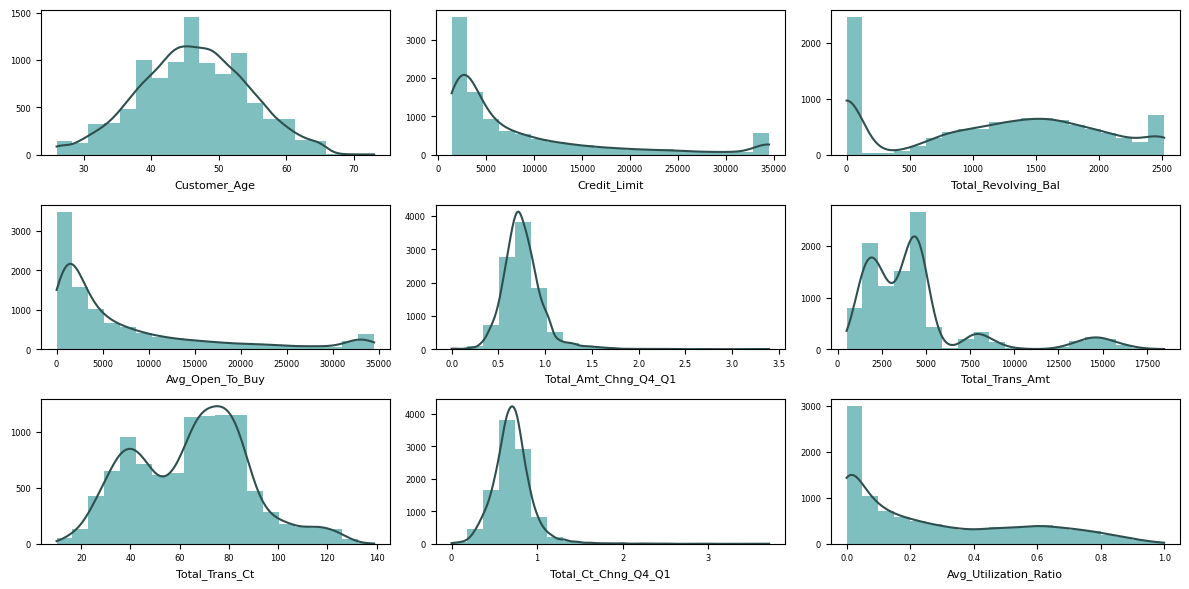

In [16]:
numeric_columns = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
plt.figure(figsize=(12, 6))
for i, var in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    ax = sns.histplot(data=df, x=var, bins=20, kde=True, color='Teal', alpha=0.5, linewidth=0)
    ax.lines[0].set_color('darkslategrey')
    plt.ylabel('')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
plt.tight_layout()
plt.show()

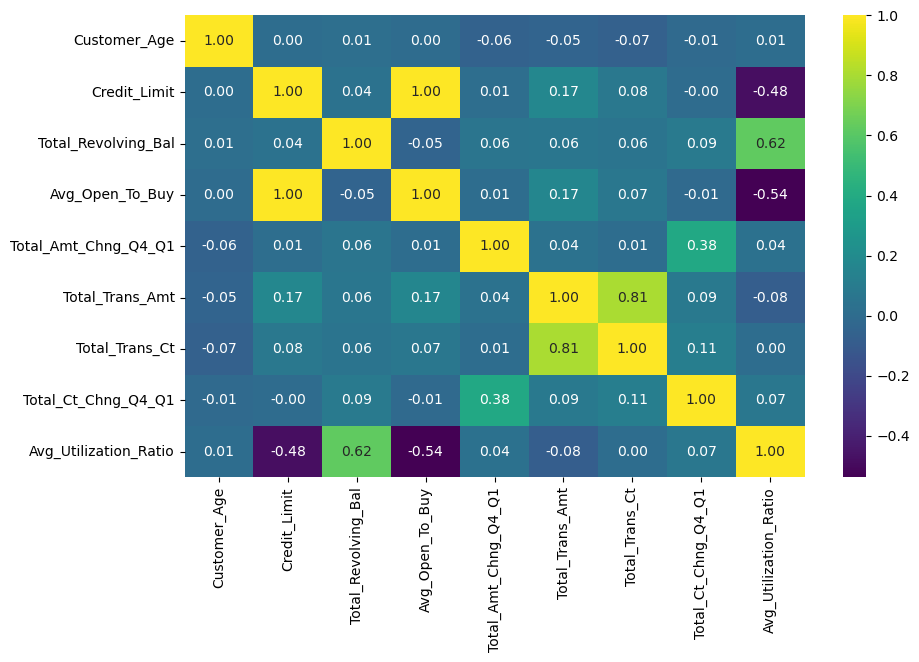

In [17]:
corr_matrix = df.loc[:, ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':10}, fmt='.2f', cmap='viridis')
plt.show()

<h1><center><span style="font-family: 'Dancing Script', cursive;"><b> Data Preparation & Model Building </b></span></center></h1>

In [18]:
X = df.loc[:, ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].copy()

In [19]:
X_scaled = StandardScaler().fit_transform(X)

In [20]:
num_clusters = [i for i in range(2, 10)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
        
    return inertia


def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

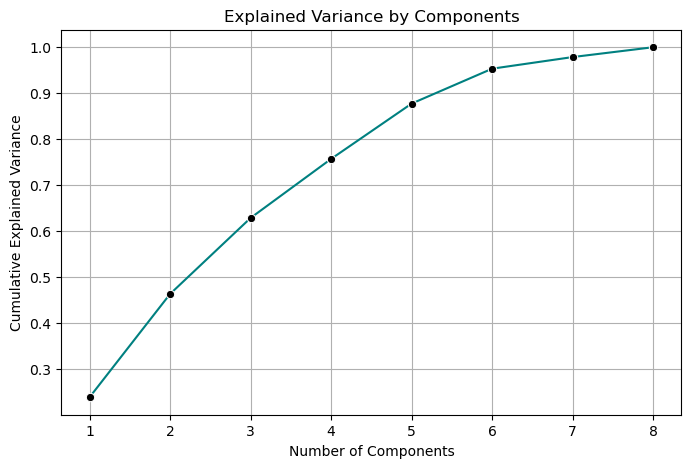

In [21]:
pca = PCA()
pca.fit(X_scaled)


plt.figure(figsize=(8, 5))
num_components = len(pca.explained_variance_ratio_)
sns.lineplot(x=range(1, num_components + 1), y=pca.explained_variance_ratio_.cumsum(), 
             marker='o', color='teal', markerfacecolor='black')
plt.title('Explained Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.xticks(range(1, num_components + 1))
plt.grid(True)
plt.show()

In [22]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
pca.transform(X_scaled)
scores_pca = pca.transform(X_scaled)

In [23]:
inertia = kmeans_inertia(num_clusters, scores_pca)
sil_score = kmeans_sil(num_clusters, scores_pca)

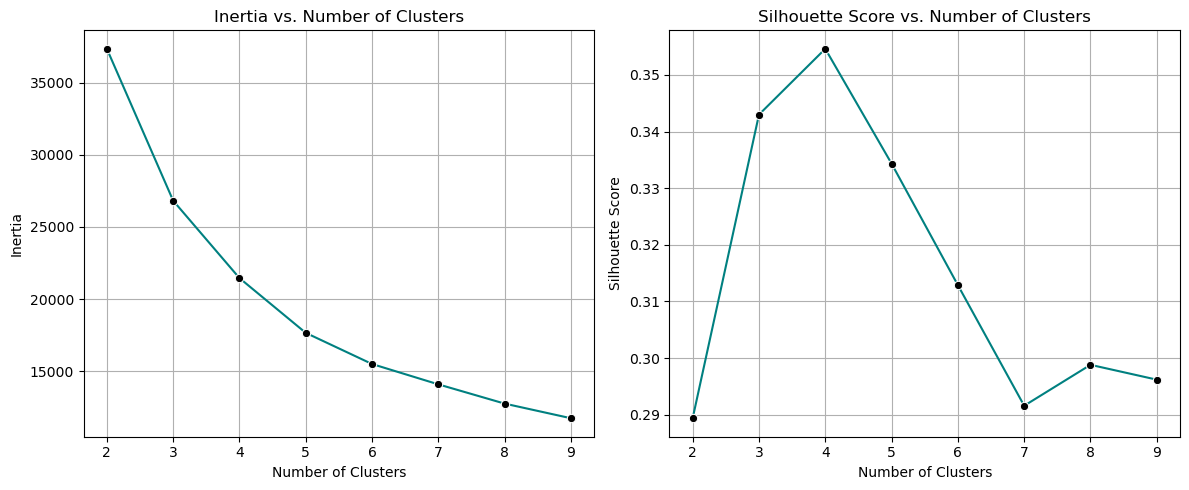

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x=num_clusters, y=inertia, marker='o', ax=ax[0], 
             color='teal', markerfacecolor='black')
ax[0].set_title('Inertia vs. Number of Clusters')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

sns.lineplot(x=num_clusters, y=sil_score, marker='o', ax=ax[1], 
             color='teal', markerfacecolor='black')
ax[1].set_title('Silhouette Score vs. Number of Clusters')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [25]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_pca.fit(scores_pca)

df_pca_kmeans = pd.concat([X.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_pca_kmeans.columns.values[-3:] = ['PCA1', 'PCA2', 'PCA3']
df_pca_kmeans['Cluster'] = kmeans_pca.labels_

In [26]:
df_pca_kmeans.head()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,PCA1,PCA2,PCA3,Cluster
0,45,12691.0,777,1.335,1144,42,1.625,0.061,-0.030988,0.311938,4.809231,2
1,49,8256.0,864,1.541,1291,33,3.714,0.105,1.060769,3.004612,10.748598,2
2,51,3418.0,0,2.594,1887,20,2.333,0.000,0.299824,1.711031,10.671881,2
3,40,3313.0,2517,1.405,1171,20,2.333,0.760,-0.929619,4.198067,6.227919,2
4,40,4716.0,0,2.175,816,28,2.500,0.000,0.393272,1.522256,9.926509,2


<h1><center><span style="font-family: 'Dancing Script', cursive;"><b> Model Evaluation </b></span></center></h1>

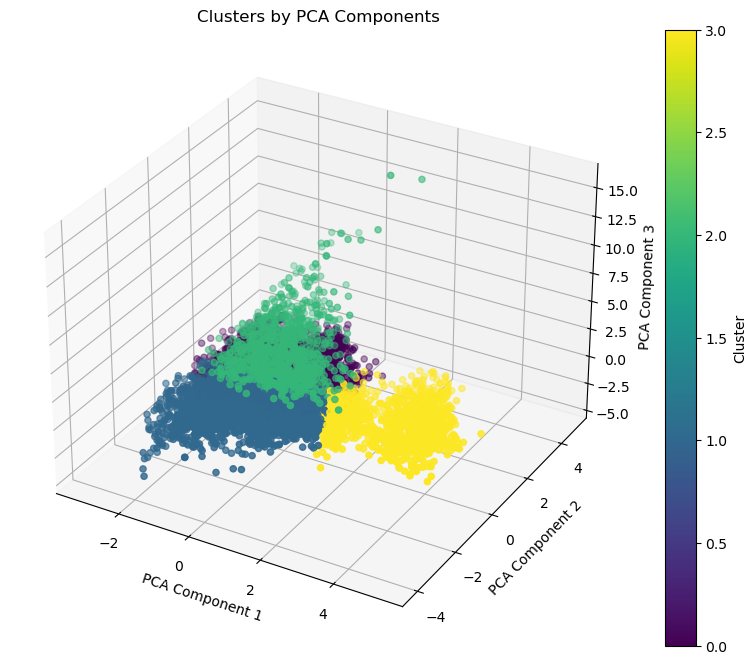

In [27]:
x_axis = df_pca_kmeans['PCA1']
y_axis = df_pca_kmeans['PCA2']
z_axis = df_pca_kmeans['PCA3']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_axis, y_axis, z_axis, c=df_pca_kmeans['Cluster'], cmap='viridis')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Clusters by PCA Components')
legend = plt.colorbar(scatter)
legend.set_label('Cluster')
plt.show()


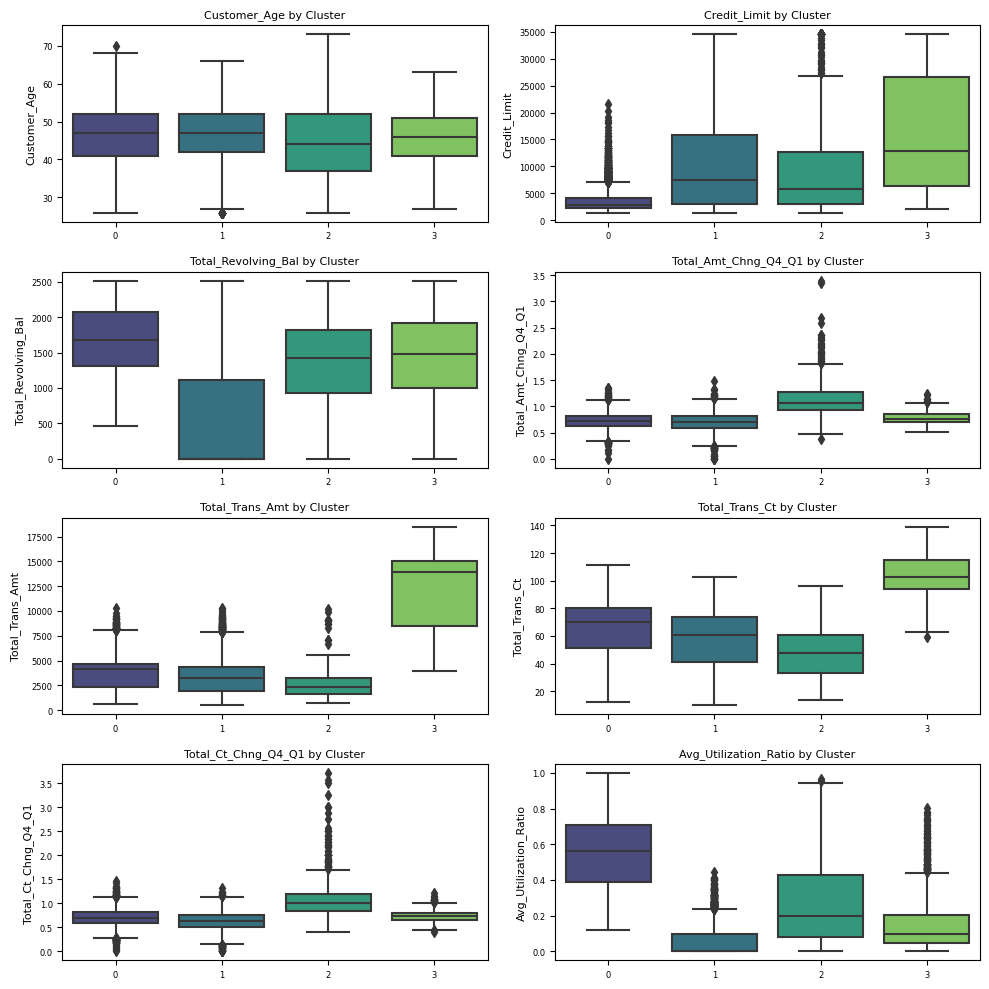

In [28]:
columns = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
           'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
           'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

fig, ax = plt.subplots(4, 2, figsize=(10, 10))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.boxplot(data=df_pca_kmeans, x='Cluster', y=column, ax=ax[i], palette='viridis')
    ax[i].set_title(f'{column} by Cluster', fontsize=8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(column, fontsize=8)
    ax[i].tick_params(axis='both', which='both', labelsize=6)
    
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

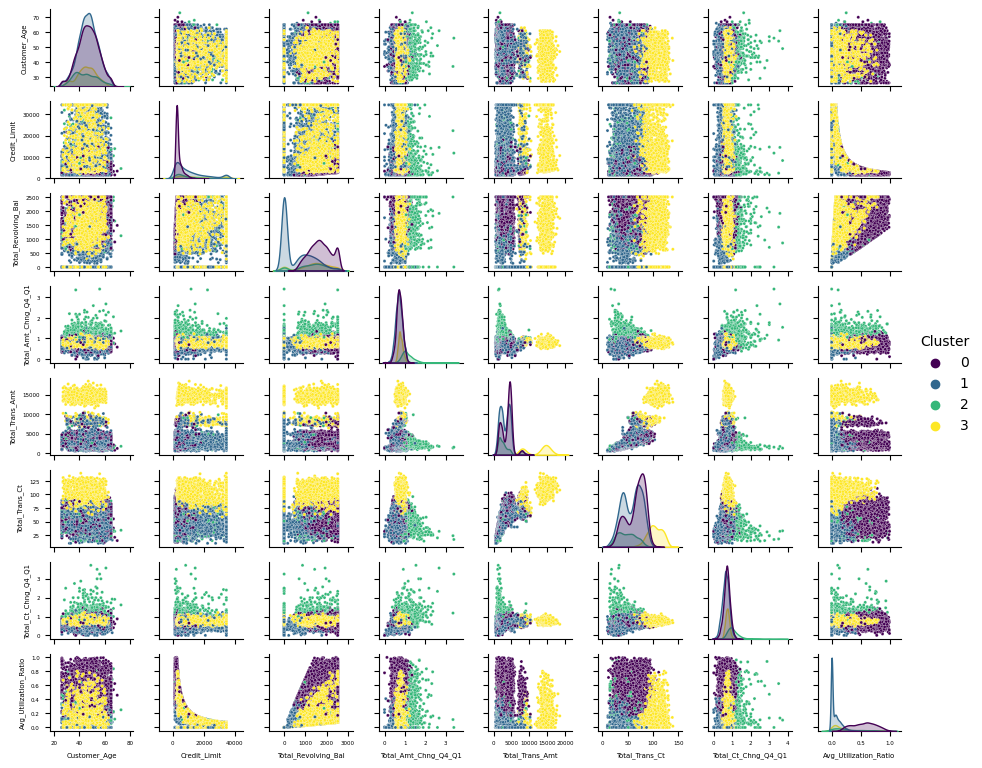

In [29]:
plt.figure(figsize=(8, 8))
pairplot = sns.pairplot(df_pca_kmeans, vars=columns, hue='Cluster', 
                        palette='viridis', plot_kws={'s': 5}, height=1, aspect=1.2)

for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=5)
    ax.set_ylabel(ax.get_ylabel(), fontsize=5)
    ax.tick_params(labelsize=4)
plt.show()